#Libraries/Modules required

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#from IPython.display import display
import torch
from torch.utils.data import TensorDataset, DataLoader
import torch.nn as nn
import torch.optim as optim

from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import KFold
from sklearn.metrics import classification_report, f1_score, accuracy_score
from sklearn.preprocessing import LabelEncoder

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Bidirectional, LSTM, Dropout, Dense, Input
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Concatenate
from tensorflow.keras.layers import Input, TimeDistributed, Conv1D, MaxPooling1D, Flatten, Bidirectional, LSTM, Dropout, Dense
from tensorflow.keras.utils import to_categorical
import tensorflow as tf

#from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import RandomOverSampler


pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

#Loading dataset

In [2]:
from google.colab import files

# Upload the files (you’ll get a file picker)
uploaded = files.upload()

Saving pirvision_office_dataset2.csv to pirvision_office_dataset2.csv
Saving pirvision_office_dataset1.csv to pirvision_office_dataset1.csv


In [3]:
#We first read the 2 data files
df1 = pd.read_csv('pirvision_office_dataset1.csv')
df2 = pd.read_csv('pirvision_office_dataset2.csv')

In [4]:
#We now merge these 2 dataframes
df = pd.concat([df1, df2], ignore_index=True)

#We print the shapes of all datafmrames
print(df1.shape, df2.shape, df.shape)

(7651, 59) (7651, 59) (15302, 59)


# Exploratory Data Analysis & Data Pre-Processing

# EDA

First few rows of the dataset:


,Date,Time,Label,Temperature_F,PIR_1,PIR_2,PIR_3,PIR_4,PIR_5,PIR_6,PIR_7,PIR_8,PIR_9,PIR_10,PIR_11,PIR_12,PIR_13,PIR_14,PIR_15,PIR_16,PIR_17,PIR_18,PIR_19,PIR_20,PIR_21,PIR_22,PIR_23,PIR_24,PIR_25,PIR_26,PIR_27,PIR_28,PIR_29,PIR_30,PIR_31,PIR_32,PIR_33,PIR_34,PIR_35,PIR_36,PIR_37,PIR_38,PIR_39,PIR_40,PIR_41,PIR_42,PIR_43,PIR_44,PIR_45,PIR_46,PIR_47,PIR_48,PIR_49,PIR_50,PIR_51,PIR_52,PIR_53,PIR_54,PIR_55
0,2024-08-08,19:19:56,0,86,10269,10721,11156,11170,10931,10671,10395,10133,9885,9705,9538,9418,9469,9599,9817,9910,9890,10075,10231,10247,10271,10229,10272,10354,10449,10451,10419,10409,10336,10306,10356,10461,10456,10460,10467,10422,10303,9877,9308,9061,9299,9748,10209,10615,10975,11178,11197,11161,11096,10957,10839,10735,10590,10411,10329
1,2024-08-08,19:20:12,1,86,10364,10907,11299,11238,10867,10535,10173,9950,9856,9795,9714,9702,9792,9789,9915,9900,9944,9964,9971,10059,10161,10234,10285,10309,10384,10464,10450,10427,10366,10361,10452,10502,10444,10337,10250,10313,10211,9718,9236,9193,9609,10022,10431,10798,11055,11122,11145,11136,11108,11041,10824,10645,10493,10398,10357
2,2024-08-08,19:20:28,0,86,10329,10793,11197,11242,11052,10658,10288,9988,9819,9711,9659,9626,9726,9752,9835,9942,9925,9965,10110,10174,10140,10235,10303,10365,10366,10379,10375,10287,10310,10345,10373,10328,10387,10415,10491,10421,10432,9964,9368,9135,9287,9643,10184,10663,11016,11168,11204,11162,11109,11007,10867,10700,10533,10427,10265
3,2024-08-08,19:20:44,0,86,10169,10425,10822,11133,11136,10834,10520,10228,9986,9848,9643,9562,9591,9618,9718,9849,9857,10026,10150,10198,10261,10351,10425,10469,10374,10344,10303,10293,10294,10333,10353,10345,10354,10362,10375,10369,10319,10115,9603,9182,9125,9560,10161,10560,10883,11116,11273,11186,10984,10910,10807,10714,10651,10562,10463
4,2024-08-08,19:21:00,0,86,10320,10667,11104,11234,11129,10814,10453,10040,9733,9630,9578,9476,9596,9748,9755,9823,10004,10048,10202,10234,10255,10282,10298,10319,10315,10270,10334,10400,10428,10514,10529,10453,10374,10303,10298,10238,10246,9918,9399,9198,9422,9848,10225,10615,10860,11006,11257,11370,11173,10924,10816,10754,10588,10428,10407


Dataset Overview:
Number of samples: 15302
Number of features: 59


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15302 entries, 0 to 15301
Data columns (total 59 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Date           15302 non-null  object
 1   Time           15302 non-null  object
 2   Label          15302 non-null  int64 
 3   Temperature_F  15302 non-null  int64 
 4   PIR_1          15302 non-null  int64 
 5   PIR_2          15302 non-null  int64 
 6   PIR_3          15302 non-null  int64 
 7   PIR_4          15302 non-null  int64 
 8   PIR_5          15302 non-null  int64 
 9   PIR_6          15302 non-null  int64 
 10  PIR_7          15302 non-null  int64 
 11  PIR_8          15302 non-null  int64 
 12  PIR_9          15302 non-null  int64 
 13  PIR_10         15302 non-null  int64 
 14  PIR_11         15302 non-null  int64 
 15  PIR_12         15302 non-null  int64 
 16  PIR_13         15302 non-null  int64 
 17  P

<ipython-input-33-a3faba68860f>:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Label', data=df, palette='viridis', legend = False)


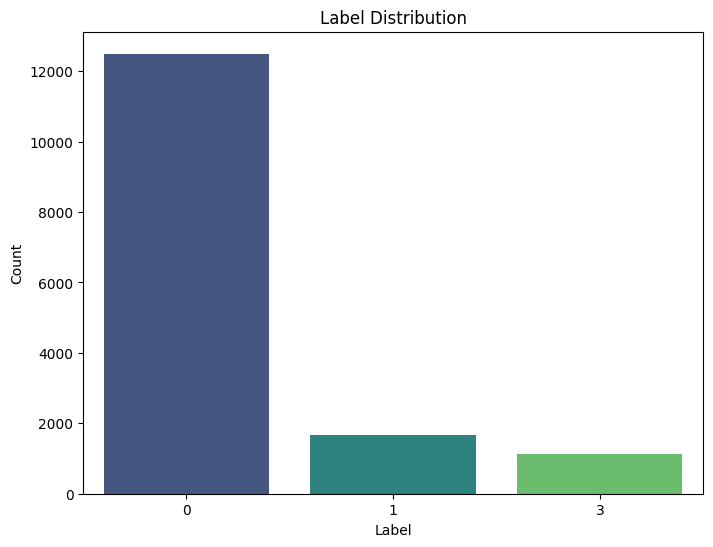


Class Distribution:
Label 0: 12494 samples (81.65%)
Label 1: 1666 samples (10.89%)
Label 3: 1142 samples (7.46%)


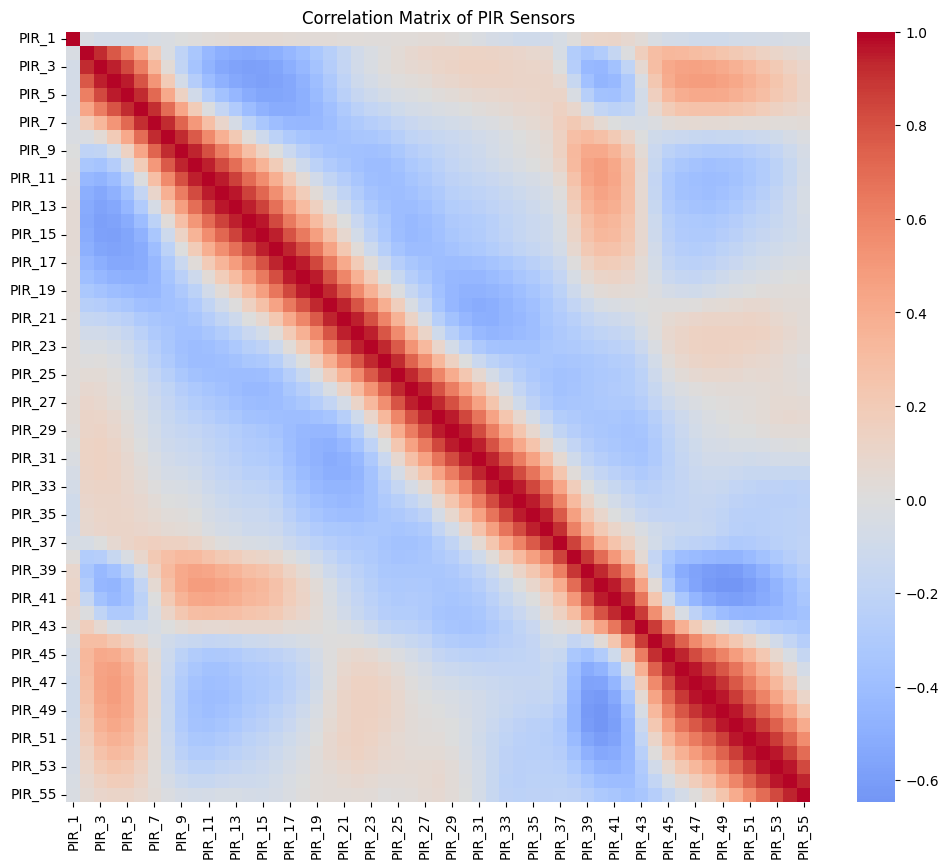


Pearson Correlation matrix between Temperature and Label:



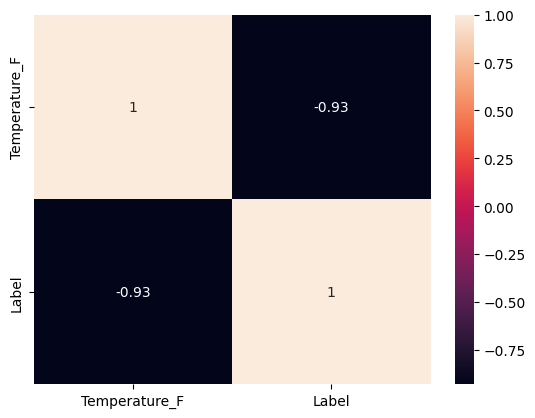

In [ ]:
# Primary anlysis based on original dataset

def Data_Analysis(df):
    # Display the first few rows of the dataset
    print("First few rows of the dataset:")
    display(df.head())
    # Dataset overview
    print("Dataset Overview:")
    print(f"Number of samples: {df.shape[0]}")
    print(f"Number of features: {df.shape[1]}")

    print("\n")
    print(df.info())

    # Label distribution visualization
    plt.figure(figsize=(8, 6))
    sns.countplot(x='Label', data=df, palette='viridis', legend = False)
    plt.title('Label Distribution')
    plt.xlabel('Label')
    plt.ylabel('Count')
    plt.show()

    # Display class distribution details
    print("\nClass Distribution:")
    label_counts = df['Label'].value_counts().sort_index()
    for label, count in label_counts.items():
        print(f"Label {label}: {count} samples ({(count / len(df)) * 100:.2f}%)")

    # Correlation matrix for PIR sensors
    pir_columns = [col for col in df.columns if col.startswith('PIR_')]

    if pir_columns:
        plt.figure(figsize=(12, 10))
        correlation_matrix = df[pir_columns].corr()
        sns.heatmap(correlation_matrix, cmap='coolwarm', center=0)
        plt.title('Correlation Matrix of PIR Sensors')
        plt.show()

    #Correlation matrix for Temperature and Label
    print('\nPearson Correlation matrix between Temperature and Label:\n')
    corr = df[['Temperature_F', 'Label']].corr(method='pearson')
    sns.heatmap(corr, annot=True)
    plt.show()

# Load and analyze the dataset
Data_Analysis(df)

# Feature Engineering

In [5]:
# Feature Engineering - PART 1

# Ensure 'Date' and 'Time' are parsed correctly
df['Datetime'] = pd.to_datetime(df['Date'] + ' ' + df['Time'])

# Extract temporal features
df['Hour'] = df['Datetime'].dt.hour
df['Minute'] = df['Datetime'].dt.minute
df['DayOfWeek'] = df['Datetime'].dt.dayofweek
df['Month'] = df['Datetime'].dt.month

df = df.drop(columns=['Date', 'Time', 'Datetime'])

#Question - Do we consider cyclic nature of minute, hour??

meta_features = ['Hour', 'Minute', 'DayOfWeek', 'Month', 'Temperature_F']

In [6]:
# Feature Engineering - PART 2

# Interpolating pairwise PIR sensor values to generate more features per time stamp
x = np.zeros((df.shape[0], 55+54+6))

for i in range(df.shape[0]):
  for j in range (0, 2):
    x[i,j] = df.iloc[i,j]
  for j in range(2, 55+54+2):
    if(j%2 == 0):
      x[i,j] = df.iloc[i,j//2]
    else:
      x[i,j] = (df.iloc[i,j//2] + df.iloc[i,j//2+1])/2
  for j in range(55+54+2, 55+54+6):
    x[i, j] = df.iloc[i, j-54]

x_df = pd.DataFrame(x)

x_df.columns = ['Label', 'Temperature_F'] + [f'PIR_{i}' for i in range(109)] + ['Hour', 'Minute', 'DayOfWeek', 'Month']

df = x_df

# Data Normalisation/Standardisation

In [7]:
# Data Preprocessing - Data standardisation
scaler = StandardScaler()

numeric_cols = df.select_dtypes(include=["float64", "int64"]).columns
numeric_cols = numeric_cols.drop("Label")  # Exclude the Label column

# Question - saw somewhere that for meta columsn(fixed range values) MInMax scaler is much better than StandardScaler?

df[numeric_cols] = scaler.fit_transform(df[numeric_cols])

In [8]:
df.head()   #Final preprocessed dataset

,Label,Temperature_F,PIR_0,PIR_1,PIR_2,PIR_3,PIR_4,PIR_5,PIR_6,PIR_7,PIR_8,PIR_9,PIR_10,PIR_11,PIR_12,PIR_13,PIR_14,PIR_15,PIR_16,PIR_17,PIR_18,PIR_19,PIR_20,PIR_21,PIR_22,PIR_23,PIR_24,PIR_25,PIR_26,PIR_27,PIR_28,PIR_29,PIR_30,PIR_31,PIR_32,PIR_33,PIR_34,PIR_35,PIR_36,PIR_37,PIR_38,PIR_39,PIR_40,PIR_41,PIR_42,PIR_43,PIR_44,PIR_45,PIR_46,PIR_47,PIR_48,PIR_49,PIR_50,PIR_51,PIR_52,PIR_53,PIR_54,PIR_55,PIR_56,PIR_57,PIR_58,PIR_59,PIR_60,PIR_61,PIR_62,PIR_63,PIR_64,PIR_65,PIR_66,PIR_67,PIR_68,PIR_69,PIR_70,PIR_71,PIR_72,PIR_73,PIR_74,PIR_75,PIR_76,PIR_77,PIR_78,PIR_79,PIR_80,PIR_81,PIR_82,PIR_83,PIR_84,PIR_85,PIR_86,PIR_87,PIR_88,PIR_89,PIR_90,PIR_91,PIR_92,PIR_93,PIR_94,PIR_95,PIR_96,PIR_97,PIR_98,PIR_99,PIR_100,PIR_101,PIR_102,PIR_103,PIR_104,PIR_105,PIR_106,PIR_107,PIR_108,Hour,Minute,DayOfWeek,Month
0,0.0,0.245676,0.245676,-0.055874,-0.055875,-0.055944,-0.494950,-0.535025,-0.551045,-0.591841,-0.616061,-0.595164,-0.558023,-0.411659,-0.230890,-0.040599,0.165129,0.314171,0.450680,0.498168,0.525723,0.528330,0.515734,0.447967,0.370196,0.279563,0.184010,0.194594,0.201863,0.243975,0.280221,0.381752,0.477645,0.453421,0.416393,0.281833,0.137928,0.199226,0.257101,0.307502,0.352263,0.280735,0.197236,0.140089,0.078255,-0.035004,-0.148685,-0.162059,-0.170861,-0.131657,-0.087877,-0.019885,0.050418,0.032361,0.013493,-0.033058,-0.077806,-0.092583,-0.103976,-0.173862,-0.238827,-0.266700,-0.288882,-0.233162,-0.170143,-0.050141,0.069416,0.075027,0.078371,0.093931,0.107238,0.127637,0.145402,0.116187,0.082729,0.108872,0.129407,0.287074,0.399382,0.472744,0.512783,0.502623,0.475682,0.477421,0.467011,0.412986,0.333056,0.177566,-0.012290,-0.189309,-0.350064,-0.398756,-0.426881,-0.457676,-0.472273,-0.531099,-0.577291,-0.599922,-0.614463,-0.599804,-0.574078,-0.578531,-0.572173,-0.534485,-0.483428,-0.424869,-0.355541,-0.338631,-0.314113,-0.347892,-0.376149,0.954478,-0.613620,-1.023796,-1.887176
1,1.0,0.245676,0.245676,-0.055852,-0.055853,-0.055878,-0.180633,-0.266177,-0.333270,-0.429731,-0.513508,-0.591975,-0.663652,-0.589812,-0.484048,-0.392987,-0.277654,-0.099009,0.084387,0.286769,0.470167,0.586064,0.679292,0.689126,0.679981,0.685867,0.676146,0.731050,0.773828,0.707510,0.621484,0.646532,0.658225,0.535910,0.397845,0.323367,0.238492,0.144941,0.045904,-0.056683,-0.161902,-0.176954,-0.186373,-0.169357,-0.146818,-0.144674,-0.138325,-0.143058,-0.143695,-0.165733,-0.182316,-0.138881,-0.089082,-0.023935,0.040904,0.013455,-0.013779,-0.041444,-0.067306,-0.124524,-0.178165,-0.179000,-0.175699,-0.074587,0.029915,0.093617,0.153468,0.104805,0.054383,-0.042301,-0.137586,-0.217401,-0.293455,-0.223551,-0.145031,-0.104631,-0.059855,0.043706,0.127043,0.285027,0.406865,0.546212,0.658589,0.799215,0.930333,0.896097,0.821685,0.664868,0.440365,0.232227,0.014222,-0.144127,-0.282181,-0.436510,-0.565744,-0.619964,-0.660100,-0.662097,-0.654840,-0.610573,-0.554029,-0.495710,-0.425187,-0.472090,-0.510887,-0.524366,-0.529183,-0.526364,-0.513220,-0.464623,-0.404123,0.954478,-0.555507,-1.023796,-1.887176
2,0.0,0.245676,0.245676,-0.055860,-0.055861,-0.055913,-0.373279,-0.442685,-0.488606,-0.505024,-0.507475,-0.441310,-0.358319,-0.315456,-0.255089,-0.158718,-0.048284,0.057081,0.160448,0.287766,0.399285,0.471542,0.526638,0.563107,0.583173,0.570159,0.544447,0.605553,0.656956,0.614442,0.555027,0.538965,0.510813,0.500290,0.475745,0.345078,0.203108,0.127798,0.047807,0.080746,0.112979,0.082539,0.048281,-0.071746,-0.189786,-0.165564,-0.136253,-0.123001,-0.106080,-0.086932,-0.064792,-0.097773,-0.127713,-0.135444,-0.138317,-0.155684,-0.168683,-0.265832,-0.352515,-0.325986,-0.291400,-0.253287,-0.208625,-0.174353,-0.134716,-0.171863,-0.203240,-0.132395,-0.059561,-0.021109,0.017668,0.106326,0.193939,0.140156,0.080640,0.244834,0.394786,0.496506,0.548397,0.592200,0.601048,0.599971,0.578221,0.522559,0.449076,0.316198,0.145808,0.049845,-0.063265,-0.165370,-0.254513,-0.312589,-0.352722,-0.430337,-0.488964,-0.533568,-0.566144,-0.593462,-0.612848,-0.588206,-0.552358,-0.524180,-0.484681,-0.463952,-0.432172

In [12]:
PIR_columns = [f'PIR_{i}' for i in range(109)] + ['Label']
PIR_data = df[PIR_columns]

In [8]:
Meta_columns = ['Temperature_F', 'Hour', 'Minute', 'DayOfWeek', 'Month']
Meta_data = df[Meta_columns]

In [11]:
Meta_data.head(10)


,Temperature_F,Hour,Minute,DayOfWeek,Month
0,0.245676,0.954478,-0.613620,-1.023796,-1.887176
1,0.245676,0.954478,-0.555507,-1.023796,-1.887176
2,0.245676,0.954478,-0.555507,-1.023796,-1.887176
3,0.245676,0.954478,-0.555507,-1.023796,-1.887176
4,0.245676,0.954478,-0.497395,-1.023796,-1.887176
5,0.245676,0.954478,-0.497395,-1.023796,-1.887176
6,0.245676,0.954478,-0.497395,-1.023796,-1.887176
7,0.245676,0.954478,-0.497395,-1.023796,-1.887176
8,0.245676,0.954478,-0.439282,-1.023796,-1.887176
9,0.245676,0.954478,-0.439282,-1.023796,-1.887176


In [12]:
PIR_data.head(10)

,PIR_0,PIR_1,PIR_2,PIR_3,PIR_4,PIR_5,PIR_6,PIR_7,PIR_8,PIR_9,PIR_10,PIR_11,PIR_12,PIR_13,PIR_14,PIR_15,PIR_16,PIR_17,PIR_18,PIR_19,PIR_20,PIR_21,PIR_22,PIR_23,PIR_24,PIR_25,PIR_26,PIR_27,PIR_28,PIR_29,PIR_30,PIR_31,PIR_32,PIR_33,PIR_34,PIR_35,PIR_36,PIR_37,PIR_38,PIR_39,PIR_40,PIR_41,PIR_42,PIR_43,PIR_44,PIR_45,PIR_46,PIR_47,PIR_48,PIR_49,PIR_50,PIR_51,PIR_52,PIR_53,PIR_54,PIR_55,PIR_56,PIR_57,PIR_58,PIR_59,PIR_60,PIR_61,PIR_62,PIR_63,PIR_64,PIR_65,PIR_66,PIR_67,PIR_68,PIR_69,PIR_70,PIR_71,PIR_72,PIR_73,PIR_74,PIR_75,PIR_76,PIR_77,PIR_78,PIR_79,PIR_80,PIR_81,PIR_82,PIR_83,PIR_84,PIR_85,PIR_86,PIR_87,PIR_88,PIR_89,PIR_90,PIR_91,PIR_92,PIR_93,PIR_94,PIR_95,PIR_96,PIR_97,PIR_98,PIR_99,PIR_100,PIR_101,PIR_102,PIR_103,PIR_104,PIR_105,PIR_106,PIR_107,PIR_108,Label
0,0.245676,-0.055874,-0.055875,-0.055944,-0.494950,-0.535025,-0.551045,-0.591841,-0.616061,-0.595164,-0.558023,-0.411659,-0.230890,-0.040599,0.165129,0.314171,0.450680,0.498168,0.525723,0.528330,0.515734,0.447967,0.370196,0.279563,0.184010,0.194594,0.201863,0.243975,0.280221,0.381752,0.477645,0.453421,0.416393,0.281833,0.137928,0.199226,0.257101,0.307502,0.352263,0.280735,0.197236,0.140089,0.078255,-0.035004,-0.148685,-0.162059,-0.170861,-0.131657,-0.087877,-0.019885,0.050418,0.032361,0.013493,-0.033058,-0.077806,-0.092583,-0.103976,-0.173862,-0.238827,-0.266700,-0.288882,-0.233162,-0.170143,-0.050141,0.069416,0.075027,0.078371,0.093931,0.107238,0.127637,0.145402,0.116187,0.082729,0.108872,0.129407,0.287074,0.399382,0.472744,0.512783,0.502623,0.475682,0.477421,0.467011,0.412986,0.333056,0.177566,-0.012290,-0.189309,-0.350064,-0.398756,-0.426881,-0.457676,-0.472273,-0.531099,-0.577291,-0.599922,-0.614463,-0.599804,-0.574078,-0.578531,-0.572173,-0.534485,-0.483428,-0.424869,-0.355541,-0.338631,-0.314113,-0.347892,-0.376149,0.0
1,0.245676,-0.055852,-0.055853,-0.055878,-0.180633,-0.266177,-0.333270,-0.429731,-0.513508,-0.591975,-0.663652,-0.589812,-0.484048,-0.392987,-0.277654,-0.099009,0.084387,0.286769,0.470167,0.586064,0.679292,0.689126,0.679981,0.685867,0.676146,0.731050,0.773828,0.707510,0.621484,0.646532,0.658225,0.535910,0.397845,0.323367,0.238492,0.144941,0.045904,-0.056683,-0.161902,-0.176954,-0.186373,-0.169357,-0.146818,-0.144674,-0.138325,-0.143058,-0.143695,-0.165733,-0.182316,-0.138881,-0.089082,-0.023935,0.040904,0.013455,-0.013779,-0.041444,-0.067306,-0.124524,-0.178165,-0.179000,-0.175699,-0.074587,0.029915,0.093617,0.153468,0.104805,0.054383,-0.042301,-0.137586,-0.217401,-0.293455,-0.223551,-0.145031,-0.104631,-0.059855,0.043706,0.127043,0.285027,0.406865,0.546212,0.658589,0.799215,0.930333,0.896097,0.821685,0.664868,0.440365,0.232227,0.014222,-0.144127,-0.282181,-0.436510,-0.565744,-0.619964,-0.660100,-0.662097,-0.654840,-0.610573,-0.554029,-0.495710,-0.425187,-0.472090,-0.510887,-0.524366,-0.529183,-0.526364,-0.513220,-0.464623,-0.404123,1.0
2,0.245676,-0.055860,-0.055861,-0.055913,-0.373279,-0.442685,-0.488606,-0.505024,-0.507475,-0.441310,-0.358319,-0.315456,-0.255089,-0.158718,-0.048284,0.057081,0.160448,0.287766,0.399285,0.471542,0.526638,0.563107,0.583173,0.570159,0.544447,0.605553,0.656956,0.614442,0.555027,0.538965,0.510813,0.500290,0.475745,0.345078,0.203108,0.127798,0.047807,0.080746,0.112979,0.082539,0.048281,-0.071746,-0.189786,-0.165564,-0.136253,-0.123001,-0.106080,-0.086932,-0.064792,-0.097773,-0.127713,-0.135444,-0.138317,-0.155684,-0.168683,-0.265832,-0.352515,-0.325986,-0.291400,-0.253287,-0.208625,-0.174353,-0.134716,-0.171863,-0.203240,-0.132395,-0.059561,-0.021109,0.017668,0.106326,0.193939,0.140156,0.080640,0.244834,0.394786,0.496506,0.548397,0.592200,0.601048,0.599971,0.578221,0.522559,0.449076,0.316198,0.145808,0.049845,-0.063265,-0.165370,-0.254513,-0.312589,-0.352722,-0.430337,-0.488964,-0.533568,-0.566144,-0.593462,-0.612848,-0.588206,-0.552358,-0.524180,-0.484681,-0.463952,-0.432172,-0.431502,-0.423068,-0.430992,-0.431114,-0.391401,-0.341720,0.0
3,0.245676,-0.055897,-0.055899,-0.056036,-0.995152,-1.049842,-1.059694,-0.876879,-0.67

In [9]:
X_Meta = Meta_data.values
X_Meta

array([[ 0.24567575,  0.95447771, -0.61361985, -1.02379551, -1.8871757 ],
       [ 0.24567575,  0.95447771, -0.55550719, -1.02379551, -1.8871757 ],
       [ 0.24567575,  0.95447771, -0.55550719, -1.02379551, -1.8871757 ],
       ...,
       [ 0.3331651 , -0.97974146,  0.25807003, -2.10198675,  1.91350377],
       [ 0.3331651 , -0.97974146,  0.31618269, -2.10198675,  1.91350377],
       [ 0.3331651 , -0.97974146,  0.31618269, -2.10198675,  1.91350377]])

# Training and Cross Validation

In [ ]:
np.average(acc)

np.float64(0.9983660130718954)

In [ ]:
np.average(f1_scores)

np.float64(0.9960051083315564)

In [15]:
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score, f1_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.utils import to_categorical
from imblearn.over_sampling import RandomOverSampler

# Load and prepare data
X = PIR_data.iloc[:, :-1].values  # First 109 columns: PIR time series
y = PIR_data.iloc[:, -1].values   # Last column: class label

# Reshape for LSTM (samples, timesteps, features)
X = X.reshape((X.shape[0], 109, 1))

# Encode labels
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)
y_categorical = to_categorical(y_encoded)

# Set up cross-validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)
fold_no = 1
f1_scores = []
accuracies = []

def create_plain_lstm():
    model = Sequential()
    model.add(LSTM(128, input_shape=(109, 1), return_sequences=True))
    model.add(Dropout(0.3))
    model.add(LSTM(64))
    model.add(Dropout(0.3))
    model.add(Dense(3, activation='softmax'))
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

for train_index, test_index in kf.split(X):
    print(f"\n--- Fold {fold_no} ---")

    # Create model
    model = create_plain_lstm()
    model.summary()

    # Split data
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y_categorical[train_index], y_categorical[test_index]

    # Resampling
    ros = RandomOverSampler(random_state=42)
    X_train_flat = X_train.reshape(X_train.shape[0], -1)
    y_train_labels = np.argmax(y_train, axis=1)

    X_resampled, y_resampled = ros.fit_resample(X_train_flat, y_train_labels)

    # Reshape back to 3D
    X_resampled = X_resampled.reshape(-1, 109, 1)
    y_resampled = to_categorical(y_resampled)

    # Train
    history = model.fit(
        X_resampled, y_resampled,
        validation_data=(X_test, y_test),
        epochs=20,
        batch_size=32,
        verbose=1
    )

    # Evaluate
    y_pred = model.predict(X_test)
    y_pred_classes = np.argmax(y_pred, axis=1)
    y_true_classes = np.argmax(y_test, axis=1)

    acc = accuracy_score(y_true_classes, y_pred_classes)
    f1 = f1_score(y_true_classes, y_pred_classes, average='macro')

    print(f"Fold {fold_no} - Accuracy: {acc:.4f}, F1 Macro: {f1:.4f}")

    accuracies.append(acc)
    f1_scores.append(f1)
    fold_no += 1

# Final results
print("\n\nFinal Results:")
print(f"Average Accuracy: {np.mean(accuracies):.4f} ± {np.std(accuracies):.4f}")
print(f"Average F1 Macro: {np.mean(f1_scores):.4f} ± {np.std(f1_scores):.4f}")



--- Fold 1 ---


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_2 (LSTM)                   │ (None, 109, 128)       │        66,560 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 109, 128)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_3 (LSTM)                   │ (None, 64)             │        49,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 3)              │           195 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 116,163 (453.76 KB)

 Trainable params: 116,163 (453.76 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
939/939 ━━━━━━━━━━━━━━━━━━━━ 208s 216ms/step - accuracy: 0.8720 - loss: 0.3371 - val_accuracy: 0.9598 - val_loss: 0.1191
Epoch 2/20
939/939 ━━━━━━━━━━━━━━━━━━━━ 266s 221ms/step - accuracy: 0.8753 - loss: 0.3093 - val_accuracy: 0.8507 - val_loss: 0.3111
Epoch 3/20
939/939 ━━━━━━━━━━━━━━━━━━━━ 256s 215ms/step - accuracy: 0.9587 - loss: 0.1395 - val_accuracy: 0.9461 - val_loss: 0.1522
Epoch 4/20
939/939 ━━━━━━━━━━━━━━━━━━━━ 201s 214ms/step - accuracy: 0.9610 - loss: 0.1410 - val_accuracy: 0.7890 - val_loss: 0.3389
Epoch 5/20
939/939 ━━━━━━━━━━━━━━━━━━━━ 200s 212ms/step - accuracy: 0.9468 - loss: 0.1674 - val_accuracy: 0.9036 - val_loss: 0.2049
Epoch 6/20
939/939 ━━━━━━━━━━━━━━━━━━━━ 203s 213ms/step - accuracy: 0.9529 - loss: 0.1462 - val_accuracy: 0.9788 - val_loss: 0.0654
Epoch 7/20
939/939 ━━━━━━━━━━━━━━━━━━━━ 210s 222ms/step - accuracy: 0.9631 - loss: 0.1185 - val_accuracy: 0.9670 - val_loss: 0.1212
Epoch 8/20
939/939 ━━━━━━━━━━━━━━━━━━━━ 261s 221ms/step - accuracy: 0.9817 -

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_4 (LSTM)                   │ (None, 109, 128)       │        66,560 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 109, 128)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_5 (LSTM)                   │ (None, 64)             │        49,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 3)              │           195 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 116,163 (453.76 KB)

 Trainable params: 116,163 (453.76 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
 95/937 ━━━━━━━━━━━━━━━━━━━━ 3:00 215ms/step - accuracy: 0.7437 - loss: 0.5893

KeyboardInterrupt: 

In [13]:
#plain lstm with weighting
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score, f1_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.utils import to_categorical
from imblearn.over_sampling import RandomOverSampler
from sklearn.utils.class_weight import compute_class_weight




# Load and prepare data
X = PIR_data.iloc[:, :-1].values  # First 109 columns: PIR time series
y = PIR_data.iloc[:, -1].values   # Last column: class label

# Reshape for LSTM (samples, timesteps, features)
X = X.reshape((X.shape[0], 109, 1))

# Encode labels
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)
y_categorical = to_categorical(y_encoded)
# Calculate class weights
class_weights = compute_class_weight('balanced',
                                     classes=np.unique(y_encoded),
                                     y=y_encoded)
class_weights = dict(enumerate(class_weights))

# Set up cross-validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)
fold_no = 1
f1_scores = []
accuracies = []

def create_plain_lstm():
    model = Sequential()
    model.add(LSTM(128, input_shape=(109, 1), return_sequences=True))
    model.add(Dropout(0.3))
    model.add(LSTM(64))
    model.add(Dropout(0.3))
    model.add(Dense(3, activation='softmax'))
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

for train_index, test_index in kf.split(X):
    print(f"\n--- Fold {fold_no} ---")

    # Create model
    model = create_plain_lstm()
    model.summary()

    # Split data
    X_resampled, X_test = X[train_index], X[test_index]
    y_resampled, y_test = y_categorical[train_index], y_categorical[test_index]



    # Train
    history = model.fit(
        X_resampled, y_resampled,
        validation_data=(X_test, y_test),
        class_weight=class_weights,
        epochs=20,
        batch_size=32,
        verbose=1
    )

    # Evaluate
    y_pred = model.predict(X_test)
    y_pred_classes = np.argmax(y_pred, axis=1)
    y_true_classes = np.argmax(y_test, axis=1)

    acc = accuracy_score(y_true_classes, y_pred_classes)
    f1 = f1_score(y_true_classes, y_pred_classes, average='macro')

    print(f"Fold {fold_no} - Accuracy: {acc:.4f}, F1 Macro: {f1:.4f}")

    accuracies.append(acc)
    f1_scores.append(f1)
    fold_no += 1

# Final results
print("\n\nFinal Results:")
print(f"Average Accuracy: {np.mean(accuracies):.4f} ± {np.std(accuracies):.4f}")
print(f"Average F1 Macro: {np.mean(f1_scores):.4f} ± {np.std(f1_scores):.4f}")



--- Fold 1 ---


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 109, 128)       │        66,560 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 109, 128)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 64)             │        49,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 3)              │           195 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 116,163 (453.76 KB)

 Trainable params: 116,163 (453.76 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
383/383 ━━━━━━━━━━━━━━━━━━━━ 93s 232ms/step - accuracy: 0.8613 - loss: 0.5142 - val_accuracy: 0.9454 - val_loss: 0.2093
Epoch 2/20
383/383 ━━━━━━━━━━━━━━━━━━━━ 136s 217ms/step - accuracy: 0.7816 - loss: 0.6022 - val_accuracy: 0.5992 - val_loss: 0.7225
Epoch 3/20
383/383 ━━━━━━━━━━━━━━━━━━━━ 147s 229ms/step - accuracy: 0.6226 - loss: 0.7807 - val_accuracy: 0.6001 - val_loss: 0.7078
Epoch 4/20
383/383 ━━━━━━━━━━━━━━━━━━━━ 143s 232ms/step - accuracy: 0.6415 - loss: 0.7641 - val_accuracy: 0.6230 - val_loss: 0.6508
Epoch 5/20
383/383 ━━━━━━━━━━━━━━━━━━━━ 89s 232ms/step - accuracy: 0.6334 - loss: 0.5964 - val_accuracy: 0.1875 - val_loss: 0.7126
Epoch 6/20
383/383 ━━━━━━━━━━━━━━━━━━━━ 142s 233ms/step - accuracy: 0.6093 - loss: 0.4996 - val_accuracy: 0.9788 - val_loss: 0.0744
Epoch 7/20
383/383 ━━━━━━━━━━━━━━━━━━━━ 144s 239ms/step - accuracy: 0.9589 - loss: 0.1236 - val_accuracy: 0.9748 - val_loss: 0.0838
Epoch 8/20
383/383 ━━━━━━━━━━━━━━━━━━━━ 89s 232ms/step - accuracy: 0.9721 - lo

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_2 (LSTM)                   │ (None, 109, 128)       │        66,560 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 109, 128)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_3 (LSTM)                   │ (None, 64)             │        49,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 3)              │           195 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 116,163 (453.76 KB)

 Trainable params: 116,163 (453.76 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
383/383 ━━━━━━━━━━━━━━━━━━━━ 93s 230ms/step - accuracy: 0.8731 - loss: 0.4824 - val_accuracy: 0.9252 - val_loss: 0.2068
Epoch 2/20
383/383 ━━━━━━━━━━━━━━━━━━━━ 141s 227ms/step - accuracy: 0.9732 - loss: 0.1030 - val_accuracy: 0.9585 - val_loss: 0.1302
Epoch 3/20
383/383 ━━━━━━━━━━━━━━━━━━━━ 88s 229ms/step - accuracy: 0.9726 - loss: 0.0872 - val_accuracy: 0.9748 - val_loss: 0.1058
Epoch 4/20
383/383 ━━━━━━━━━━━━━━━━━━━━ 142s 229ms/step - accuracy: 0.9730 - loss: 0.0855 - val_accuracy: 0.9755 - val_loss: 0.0809
Epoch 5/20
383/383 ━━━━━━━━━━━━━━━━━━━━ 143s 233ms/step - accuracy: 0.9759 - loss: 0.0864 - val_accuracy: 0.9807 - val_loss: 0.0640
Epoch 6/20
383/383 ━━━━━━━━━━━━━━━━━━━━ 140s 229ms/step - accuracy: 0.6697 - loss: 0.7779 - val_accuracy: 0.8683 - val_loss: 0.4517
Epoch 7/20
383/383 ━━━━━━━━━━━━━━━━━━━━ 88s 230ms/step - accuracy: 0.8202 - loss: 0.3692 - val_accuracy: 0.9830 - val_loss: 0.0724
Epoch 8/20
383/383 ━━━━━━━━━━━━━━━━━━━━ 142s 230ms/step - accuracy: 0.9647 - lo

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_4 (LSTM)                   │ (None, 109, 128)       │        66,560 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 109, 128)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_5 (LSTM)                   │ (None, 64)             │        49,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 3)              │           195 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 116,163 (453.76 KB)

 Trainable params: 116,163 (453.76 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
383/383 ━━━━━━━━━━━━━━━━━━━━ 91s 227ms/step - accuracy: 0.8362 - loss: 0.5566 - val_accuracy: 0.9719 - val_loss: 0.0949
Epoch 2/20
383/383 ━━━━━━━━━━━━━━━━━━━━ 145s 236ms/step - accuracy: 0.9526 - loss: 0.1555 - val_accuracy: 0.0693 - val_loss: 1.4258
Epoch 3/20
383/383 ━━━━━━━━━━━━━━━━━━━━ 90s 236ms/step - accuracy: 0.5853 - loss: 0.9096 - val_accuracy: 0.9778 - val_loss: 0.0699
Epoch 4/20
383/383 ━━━━━━━━━━━━━━━━━━━━ 142s 237ms/step - accuracy: 0.9557 - loss: 0.1085 - val_accuracy: 0.9056 - val_loss: 0.3499
Epoch 5/20
383/383 ━━━━━━━━━━━━━━━━━━━━ 90s 235ms/step - accuracy: 0.9511 - loss: 0.1078 - val_accuracy: 0.9794 - val_loss: 0.0600
Epoch 6/20
383/383 ━━━━━━━━━━━━━━━━━━━━ 143s 237ms/step - accuracy: 0.9704 - loss: 0.0782 - val_accuracy: 0.9863 - val_loss: 0.0449
Epoch 7/20
383/383 ━━━━━━━━━━━━━━━━━━━━ 141s 235ms/step - accuracy: 0.9472 - loss: 0.3448 - val_accuracy: 0.9863 - val_loss: 0.0377
Epoch 8/20
383/383 ━━━━━━━━━━━━━━━━━━━━ 142s 235ms/step - accuracy: 0.9770 - lo

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_6 (LSTM)                   │ (None, 109, 128)       │        66,560 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 109, 128)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_7 (LSTM)                   │ (None, 64)             │        49,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 3)              │           195 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 116,163 (453.76 KB)

 Trainable params: 116,163 (453.76 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
383/383 ━━━━━━━━━━━━━━━━━━━━ 89s 224ms/step - accuracy: 0.8659 - loss: 0.4888 - val_accuracy: 0.8425 - val_loss: 0.3669
Epoch 2/20
383/383 ━━━━━━━━━━━━━━━━━━━━ 142s 223ms/step - accuracy: 0.7916 - loss: 0.6004 - val_accuracy: 0.9526 - val_loss: 0.1527
Epoch 3/20
383/383 ━━━━━━━━━━━━━━━━━━━━ 145s 231ms/step - accuracy: 0.9588 - loss: 0.2657 - val_accuracy: 0.9552 - val_loss: 0.1333
Epoch 4/20
383/383 ━━━━━━━━━━━━━━━━━━━━ 89s 231ms/step - accuracy: 0.9520 - loss: 0.3145 - val_accuracy: 0.9627 - val_loss: 0.1095
Epoch 5/20
383/383 ━━━━━━━━━━━━━━━━━━━━ 143s 235ms/step - accuracy: 0.9521 - loss: 0.3149 - val_accuracy: 0.9513 - val_loss: 0.1408
Epoch 6/20
383/383 ━━━━━━━━━━━━━━━━━━━━ 141s 234ms/step - accuracy: 0.9544 - loss: 0.3006 - val_accuracy: 0.9353 - val_loss: 0.2146
Epoch 7/20
383/383 ━━━━━━━━━━━━━━━━━━━━ 141s 231ms/step - accuracy: 0.9456 - loss: 0.3140 - val_accuracy: 0.9641 - val_loss: 0.1123
Epoch 8/20
383/383 ━━━━━━━━━━━━━━━━━━━━ 139s 222ms/step - accuracy: 0.9529 - l

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_8 (LSTM)                   │ (None, 109, 128)       │        66,560 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_8 (Dropout)             │ (None, 109, 128)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_9 (LSTM)                   │ (None, 64)             │        49,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_9 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 3)              │           195 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 116,163 (453.76 KB)

 Trainable params: 116,163 (453.76 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
383/383 ━━━━━━━━━━━━━━━━━━━━ 90s 225ms/step - accuracy: 0.8783 - loss: 0.4734 - val_accuracy: 0.9647 - val_loss: 0.1085
Epoch 2/20
383/383 ━━━━━━━━━━━━━━━━━━━━ 89s 232ms/step - accuracy: 0.9304 - loss: 0.3771 - val_accuracy: 0.9673 - val_loss: 0.1133
Epoch 3/20
383/383 ━━━━━━━━━━━━━━━━━━━━ 142s 233ms/step - accuracy: 0.9517 - loss: 0.2749 - val_accuracy: 0.9709 - val_loss: 0.0800
Epoch 4/20
383/383 ━━━━━━━━━━━━━━━━━━━━ 139s 224ms/step - accuracy: 0.9566 - loss: 0.1366 - val_accuracy: 0.9719 - val_loss: 0.0795
Epoch 5/20
383/383 ━━━━━━━━━━━━━━━━━━━━ 86s 224ms/step - accuracy: 0.9638 - loss: 0.1080 - val_accuracy: 0.9428 - val_loss: 0.2002
Epoch 6/20
383/383 ━━━━━━━━━━━━━━━━━━━━ 89s 232ms/step - accuracy: 0.9461 - loss: 0.3560 - val_accuracy: 0.9657 - val_loss: 0.1210
Epoch 7/20
383/383 ━━━━━━━━━━━━━━━━━━━━ 89s 232ms/step - accuracy: 0.9462 - loss: 0.3182 - val_accuracy: 0.9595 - val_loss: 0.1325
Epoch 8/20
383/383 ━━━━━━━━━━━━━━━━━━━━ 87s 226ms/step - accuracy: 0.9474 - loss:

In [17]:
# ======== Modified: Class Weight Calculation ========
from sklearn.utils.class_weight import compute_class_weight

# Calculate class weights
class_weights = compute_class_weight('balanced',
                                     classes=np.unique(y_encoded),
                                     y=y_encoded)
class_weights = dict(enumerate(class_weights))

# ======== Modified Model Compilation ========
def create_model():
    model = Sequential()
    model.add(Input(shape=(1, 109, 1)))
    model.add(TimeDistributed(Conv1D(256, 3, activation='relu')))
    model.add(TimeDistributed(MaxPooling1D(2)))
    model.add(TimeDistributed(Conv1D(128, 3, activation='relu')))
    model.add(TimeDistributed(MaxPooling1D(2)))
    model.add(TimeDistributed(Flatten()))
    model.add(Bidirectional(LSTM(128, return_sequences=True)))
    model.add(Bidirectional(LSTM(50)))
    model.add(Dropout(0.5))
    model.add(Dense(3, activation='softmax'))

    # Use weighted crossentropy
    model.compile(optimizer='adam',
                loss='categorical_crossentropy',
                metrics=['accuracy'])
    return model

# ======== Modified Training Loop ========
for train_index, test_index in kf.split(X):
    print(f"\n--- Fold {fold_no} ---")

    model = create_model()
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y_categorical[train_index], y_categorical[test_index]

    # ======== REMOVED OVERSAMPLING ========
    # Train with class weights
    history = model.fit(
        X_train, y_train,
        validation_data=(X_test, y_test),
        class_weight=class_weights,  # Apply class weights
        epochs=20,
        batch_size=32
    )

    # Evaluation remains same
    y_pred = model.predict(X_test)
    y_pred_classes = np.argmax(y_pred, axis=1)
    y_true_classes = np.argmax(y_test, axis=1)

    acc = accuracy_score(y_true_classes, y_pred_classes)
    f1 = f1_score(y_true_classes, y_pred_classes, average='macro')

    accuracies.append(acc)
    f1_scores.append(f1)
    fold_no += 1



--- Fold 2 ---
Epoch 1/20


ValueError: Exception encountered when calling TimeDistributed.call().

[1mNegative dimension size caused by subtracting 3 from 1 for '{{node sequential_3_1/time_distributed_1/convolution}} = Conv2D[T=DT_FLOAT, data_format="NHWC", dilations=[1, 1, 1, 1], explicit_paddings=[], padding="VALID", strides=[1, 1, 1, 1], use_cudnn_on_gpu=true](sequential_3_1/time_distributed_1/convolution/ExpandDims, sequential_3_1/time_distributed_1/convolution/ExpandDims_1)' with input shapes: [?,1,1,1], [1,3,1,256].[0m

Arguments received by TimeDistributed.call():
  • inputs=tf.Tensor(shape=(None, 109, 1, 1), dtype=float32)
  • training=True
  • mask=None

In [16]:
import numpy as np
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score, f1_score
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, LSTM, Dense, Dropout, Concatenate
from tensorflow.keras.utils import to_categorical
from imblearn.over_sampling import RandomOverSampler

# Load and prepare data
X_ts = PIR_data.iloc[:, :-1].values.reshape(-1, 109, 1)  # Time series data
X_meta = X_Meta # Metadata
y = PIR_data.iloc[:, -1].values  # Labels
# Encode labels
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)
y_categorical = to_categorical(y_encoded)

# Cross-validation setup
kf = KFold(n_splits=5, shuffle=True, random_state=42)
f1_scores, accuracies = [], []

def create_lstm_with_meta():
    # Time series branch
    ts_input = Input(shape=(109, 1), name='ts_input')
    x = LSTM(128, return_sequences=True)(ts_input)
    x = Dropout(0.3)(x)
    ts_features = LSTM(64)(x)

    # Metadata branch
    meta_input = Input(shape=(X_meta.shape[1],), name='meta_input')

    # Concatenate before final FC
    merged = Concatenate()([ts_features, meta_input])
    x = Dropout(0.4)(merged)
    outputs = Dense(3, activation='softmax')(x)

    return Model(inputs=[ts_input, meta_input], outputs=outputs)

for fold_no, (train_idx, test_idx) in enumerate(kf.split(X_ts), 1):
    print(f"\n--- Fold {fold_no} ---")

    # Split data
    X_train_ts, X_test_ts = X_ts[train_idx], X_ts[test_idx]
    X_train_meta, X_test_meta = X_meta[train_idx], X_meta[test_idx]
    y_train, y_test = y_categorical[train_idx], y_categorical[test_idx]

    # ROS oversampling
    ros = RandomOverSampler(random_state=42)
    X_train_flat = X_train_ts.reshape(len(X_train_ts), -1)
    combined_train = np.hstack([X_train_flat, X_train_meta])

    X_resampled, y_resampled = ros.fit_resample(combined_train, np.argmax(y_train, axis=1))

    # Split back components
    X_resampled_ts = X_resampled[:, :-X_meta.shape[1]].reshape(-1, 109, 1)
    X_resampled_meta = X_resampled[:, -X_meta.shape[1]:]
    y_resampled = to_categorical(y_resampled)

    # Create and train model
    model = create_lstm_with_meta()
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

    history = model.fit(
        [X_resampled_ts, X_resampled_meta], y_resampled,
        validation_data=([X_test_ts, X_test_meta], y_test),
        epochs=20,
        batch_size=32,
        verbose=1
    )

    # Evaluation
    y_pred = model.predict([X_test_ts, X_test_meta])
    y_pred_classes = np.argmax(y_pred, axis=1)
    y_true_classes = np.argmax(y_test, axis=1)

    acc = accuracy_score(y_true_classes, y_pred_classes)
    f1 = f1_score(y_true_classes, y_pred_classes, average='macro')

    accuracies.append(acc)
    f1_scores.append(f1)
    print(f"Fold {fold_no} - Accuracy: {acc:.4f}, F1: {f1:.4f}")

# Final results
print("\nFinal Metrics:")
print(f"Mean Accuracy: {np.mean(accuracies):.4f} (±{np.std(accuracies):.4f})")
print(f"Mean F1-Score: {np.mean(f1_scores):.4f} (±{np.std(f1_scores):.4f})")



--- Fold 1 ---
Epoch 1/20
939/939 ━━━━━━━━━━━━━━━━━━━━ 244s 256ms/step - accuracy: 0.8898 - loss: 0.3212 - val_accuracy: 0.9755 - val_loss: 0.1140
Epoch 2/20
939/939 ━━━━━━━━━━━━━━━━━━━━ 229s 221ms/step - accuracy: 0.9227 - loss: 0.2156 - val_accuracy: 0.9755 - val_loss: 0.0626
Epoch 3/20
939/939 ━━━━━━━━━━━━━━━━━━━━ 256s 214ms/step - accuracy: 0.9818 - loss: 0.0587 - val_accuracy: 0.9781 - val_loss: 0.0630
Epoch 4/20
939/939 ━━━━━━━━━━━━━━━━━━━━ 212s 225ms/step - accuracy: 0.9845 - loss: 0.0510 - val_accuracy: 0.9778 - val_loss: 0.0693
Epoch 5/20
939/939 ━━━━━━━━━━━━━━━━━━━━ 263s 226ms/step - accuracy: 0.9871 - loss: 0.0407 - val_accuracy: 0.9781 - val_loss: 0.0545
Epoch 6/20
939/939 ━━━━━━━━━━━━━━━━━━━━ 215s 229ms/step - accuracy: 0.9874 - loss: 0.0410 - val_accuracy: 0.9850 - val_loss: 0.0372
Epoch 7/20
939/939 ━━━━━━━━━━━━━━━━━━━━ 256s 222ms/step - accuracy: 0.9888 - loss: 0.0370 - val_accuracy: 0.9755 - val_loss: 0.0716
Epoch 8/20
939/939 ━━━━━━━━━━━━━━━━━━━━ 266s 227ms/step - ac

KeyboardInterrupt: 

In [15]:
#weighted CE  + Meta data+ Normalisation
import numpy as np
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score, f1_score
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, LSTM, Dense, Dropout, Concatenate
from tensorflow.keras.utils import to_categorical
from imblearn.over_sampling import RandomOverSampler

# Load and prepare data
X_ts = PIR_data.iloc[:, :-1].values.reshape(-1, 109, 1)  # Time series data
X_meta = X_Meta # Metadata
y = PIR_data.iloc[:, -1].values  # Labels
# Encode labels
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)
y_categorical = to_categorical(y_encoded)
# Calculate class weights
class_weights = compute_class_weight('balanced',
                                     classes=np.unique(y_encoded),
                                     y=y_encoded)
class_weights = dict(enumerate(class_weights))

# Cross-validation setup
kf = KFold(n_splits=5, shuffle=True, random_state=42)
f1_scores, accuracies = [], []

def create_lstm_with_meta():
    # Time series branch
    ts_input = Input(shape=(109, 1), name='ts_input')
    x = LSTM(128, return_sequences=True)(ts_input)
    x = Dropout(0.3)(x)
    ts_features = LSTM(64)(x)

    # Metadata branch
    meta_input = Input(shape=(X_meta.shape[1],), name='meta_input')

    # Concatenate before final FC
    merged = Concatenate()([ts_features, meta_input])
    x = Dropout(0.4)(merged)
    outputs = Dense(3, activation='softmax')(x)

    return Model(inputs=[ts_input, meta_input], outputs=outputs)

for fold_no, (train_idx, test_idx) in enumerate(kf.split(X_ts), 1):
    print(f"\n--- Fold {fold_no} ---")

    # Split data
    X_train_ts, X_test_ts = X_ts[train_idx], X_ts[test_idx]
    X_train_meta, X_test_meta = X_meta[train_idx], X_meta[test_idx]
    y_train, y_test = y_categorical[train_idx], y_categorical[test_idx]


    # Create and train model
    model = create_lstm_with_meta()
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

    history = model.fit(
        [X_train_ts, X_train_meta], y_train,
        validation_data=([X_test_ts, X_test_meta], y_test),
        class_weight = class_weights,
        epochs=20,
        batch_size=32,
        verbose=1
    )

    # Evaluation
    y_pred = model.predict([X_test_ts, X_test_meta])
    y_pred_classes = np.argmax(y_pred, axis=1)
    y_true_classes = np.argmax(y_test, axis=1)

    acc = accuracy_score(y_true_classes, y_pred_classes)
    f1 = f1_score(y_true_classes, y_pred_classes, average='macro')

    accuracies.append(acc)
    f1_scores.append(f1)
    print(f"Fold {fold_no} - Accuracy: {acc:.4f}, F1: {f1:.4f}")

# Final results
print("\nFinal Metrics:")
print(f"Mean Accuracy: {np.mean(accuracies):.4f} (±{np.std(accuracies):.4f})")
print(f"Mean F1-Score: {np.mean(f1_scores):.4f} (±{np.std(f1_scores):.4f})")



--- Fold 1 ---
Epoch 1/20
383/383 ━━━━━━━━━━━━━━━━━━━━ 103s 244ms/step - accuracy: 0.7747 - loss: 0.8525 - val_accuracy: 0.6874 - val_loss: 0.6101
Epoch 2/20
383/383 ━━━━━━━━━━━━━━━━━━━━ 144s 249ms/step - accuracy: 0.6939 - loss: 0.7032 - val_accuracy: 0.6223 - val_loss: 0.8832
Epoch 3/20
383/383 ━━━━━━━━━━━━━━━━━━━━ 137s 236ms/step - accuracy: 0.5731 - loss: 0.8054 - val_accuracy: 0.8942 - val_loss: 0.3933
Epoch 4/20
383/383 ━━━━━━━━━━━━━━━━━━━━ 93s 243ms/step - accuracy: 0.8587 - loss: 0.4005 - val_accuracy: 0.9543 - val_loss: 0.1707
Epoch 5/20
383/383 ━━━━━━━━━━━━━━━━━━━━ 144s 248ms/step - accuracy: 0.9533 - loss: 0.1279 - val_accuracy: 0.9650 - val_loss: 0.1079
Epoch 6/20
383/383 ━━━━━━━━━━━━━━━━━━━━ 138s 238ms/step - accuracy: 0.9619 - loss: 0.1326 - val_accuracy: 0.9794 - val_loss: 0.0661
Epoch 7/20
383/383 ━━━━━━━━━━━━━━━━━━━━ 143s 242ms/step - accuracy: 0.9742 - loss: 0.0614 - val_accuracy: 0.9866 - val_loss: 0.0471
Epoch 8/20
383/383 ━━━━━━━━━━━━━━━━━━━━ 143s 245ms/step - acc

KeyboardInterrupt: 

In [ ]:
#BILSTM + CNN with oversampling,109 PIR values only (NO META DATA included)
X = PIR_data.iloc[:, :-1].values  # first 55 columns: the PIR time series
y = PIR_data.iloc[:, -1].values   # last column: the class label

X = X.reshape((X.shape[0], 1, 109, 1))


label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)  # now y becomes 0, 1, 2
y_categorical = to_categorical(y_encoded)

# Set up cross-validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)
fold_no = 1

f1_scores = []
accuracies = []

for train_index, test_index in kf.split(X):
    print(f"\n--- Fold {fold_no} ---")

    # --- Build CNN-LSTM Model ---
    model = Sequential()
    model.add(Input(shape=(1, 109, 1)))
    model.add(TimeDistributed(Conv1D(filters=256, kernel_size=3, activation='relu')))
    model.add(TimeDistributed(MaxPooling1D(pool_size=2, padding='same')))
    model.add(TimeDistributed(Conv1D(filters=128, kernel_size=3, activation='relu')))
    model.add(TimeDistributed(MaxPooling1D(pool_size=2, padding='same')))
    model.add(TimeDistributed(Flatten()))
    model.add(Bidirectional(LSTM(128, activation='relu', return_sequences=True)))
    model.add(Bidirectional(LSTM(50, activation='relu')))
    model.add(Dropout(0.5))
    model.add(Dense(3, activation='softmax'))
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    model.summary()

    # X_train, X_test, y_train, y_test = train_test_split(X, y_categorical, test_size=0.2, random_state=42)

    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y_categorical[train_index], y_categorical[test_index]

    # Apply Random Oversampling
    ros = RandomOverSampler(random_state=42)
    y_train_labels = np.argmax(y_train, axis=1)  # Convert one-hot to label
    X_train_flat = X_train.reshape(X_train.shape[0], -1)  # Flatten to 2D

    X_train_resampled, y_train_resampled = ros.fit_resample(X_train_flat, y_train_labels)

    # Reshape X back to 4D and y back to one-hot
    X_train_resampled = X_train_resampled.reshape(X_train_resampled.shape[0], 1, 109, 1)
    y_train_resampled = to_categorical(y_train_resampled)

    # --- Train the Model ---
    history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_test, y_test))

    y_pred = model.predict(X_test)
    y_pred_classes = np.argmax(y_pred, axis=1)
    y_true_classes = np.argmax(y_test, axis=1)

    acc = accuracy_score(y_true_classes, y_pred_classes)
    f1 = f1_score(y_true_classes, y_pred_classes, average='macro')

    print("Accuracy:", acc)
    print("F1 Macro Score:", f1)
    # print(classification_report(y_true_classes, y_pred_classes, target_names=label_encoder.classes_))

    accuracies.append(acc)
    f1_scores.append(f1)

    fold_no += 1

    # y_pred_labels = label_encoder.inverse_transform(y_pred_classes)
    # y_true_labels = label_encoder.inverse_transform(y_true_classes)

    # from sklearn.metrics import classification_report
    # print(classification_report(y_true_classes, y_pred_classes))


--- Fold 1 ---


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ time_distributed                │ (None, 1, 107, 256)    │         1,024 │
│ (TimeDistributed)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ time_distributed_1              │ (None, 1, 54, 256)     │             0 │
│ (TimeDistributed)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ time_distributed_2              │ (None, 1, 52, 128)     │        98,432 │
│ (TimeDistributed)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ time_distributed_3              │ (None, 1, 26, 128)     │             0 │
│ (TimeDistributed)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ time_distributed_4              │ (None, 1, 3328)        │             0 │
│ (TimeDistributed)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional (Bidirectional)   │ (None, 1, 256)         │     3,539,968 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_1 (Bidirectional) │ (None, 100)            │       122,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 100)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 3)              │           303 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,762,527 (14.35 MB)

 Trainable params: 3,762,527 (14.35 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
383/383 ━━━━━━━━━━━━━━━━━━━━ 56s 122ms/step - accuracy: 0.9122 - loss: 0.3625 - val_accuracy: 0.9837 - val_loss: 0.0596
Epoch 2/20
383/383 ━━━━━━━━━━━━━━━━━━━━ 97s 161ms/step - accuracy: 0.9849 - loss: 0.0617 - val_accuracy: 0.9899 - val_loss: 0.0299
Epoch 3/20
383/383 ━━━━━━━━━━━━━━━━━━━━ 66s 119ms/step - accuracy: 0.9905 - loss: 0.0301 - val_accuracy: 0.9869 - val_loss: 0.0512
Epoch 4/20
383/383 ━━━━━━━━━━━━━━━━━━━━ 81s 117ms/step - accuracy: 0.9896 - loss: 0.0309 - val_accuracy: 0.9915 - val_loss: 0.0192
Epoch 5/20
383/383 ━━━━━━━━━━━━━━━━━━━━ 81s 116ms/step - accuracy: 0.9898 - loss: 0.0272 - val_accuracy: 0.9837 - val_loss: 0.0410
Epoch 6/20


KeyboardInterrupt: 